In [135]:
from utils import *

ModuleNotFoundError: No module named 'utils'

In [ ]:
ge_df = pd.read_csv("datasets/merged-combat15.csv", index_col="patient_ID")
state_df = pd.read_csv("datasets/state_and_outcome.csv", index_col="patient_ID")
bc_clinical_df = pd.read_csv("datasets/bcClinicalTable.csv", index_col="patient_ID")
tamoxifen_studies = ["GSE12093",  "GSE1379", "GSE16391", "GSE17705", "GSE6577",  "GSE9893"]

In [4]:
state_sub_df = state_df[state_df["series_id"].isin(tamoxifen_studies)]
state_sub_df

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2
patient_ID,,,,,,,,,,,,,,,
249296,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,NaN,T1,LumA,k2,0,0.0
249524,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumB,k2,1,1.0
249527,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T2,LumA,k1,0,0.0
249529,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T1,LumA,k2,0,0.0
249530,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumA,k1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k3,1,1.0
305261,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k5,1,1.0
305262,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k4,1,1.0


In [8]:
cols = ["gpl", "ER", "HER2", "PR", "node", "tumor", "pam_coincide", "p5"]

for col in cols:
    print("{0}: {1}".format(col, state_sub_df[col].unique()))

gpl: ['GPL5049' 'GPL1223' 'GPL96' 'GPL570']
ER: [1. 0.]
HER2: [nan  1.  0.]
PR: [ 0.  1. nan]
node: [nan  1.  0.]
tumor: ['T1' 'T2' 'T4' 'T3' nan]
pam_coincide: ['LumA' 'LumB' 'Her2' 'Basal' 'Normal']
p5: ['k2' 'k1' 'k3' 'k5' 'k4']


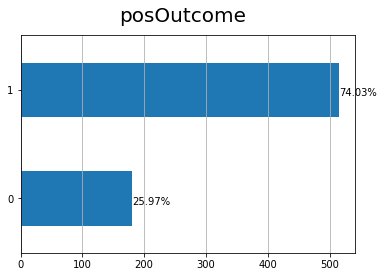

In [10]:
plot_percentages(state_sub_df)

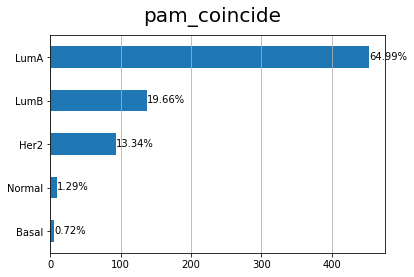

In [11]:
plot_percentages(state_sub_df, "pam_coincide")

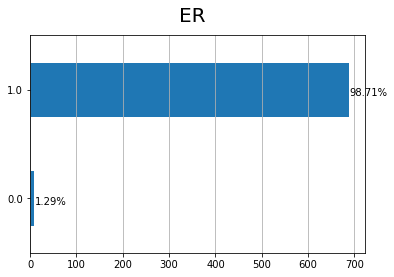

In [12]:
plot_percentages(state_sub_df, "ER")

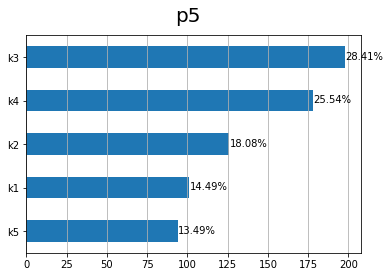

In [13]:
plot_percentages(state_sub_df, "p5")


In [15]:
ge_sub_df = ge_df.loc[state_sub_df.index,:]
ge_sub_outcome_df = pd.merge(state_sub_df["posOutcome"], ge_sub_df, left_index=True, right_index=True)
ge_sub_outcome_df

,posOutcome,MAGEA12,MAGEA11,KLF1,ADH7,MSH4,BIRC3,AKR1C4,GBX2,GCGR,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,0,2.285195,3.043960,2.952962,4.513953,3.102626,7.586251,4.275627,4.458052,4.178622,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,3.381688,2.661676,3.272007,3.531694,3.353370,4.588844,3.663602,3.521204,3.846181,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,0,2.094866,2.520580,2.594458,4.040455,3.346975,5.152486,3.740045,4.026526,3.877694,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,0,1.968330,2.811034,3.053672,3.463053,3.129372,4.640033,4.019807,4.285670,3.770153,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1.962373,2.692571,2.563466,3.162734,3.438638,6.213917,3.842804,3.876211,3.776923,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,3.152498,3.654102,3.536782,3.613843,3.624577,4.750623,3.489415,3.558475,3.608941,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,3.152498,3.654102,3.593650,3.613843,3.624577,5.677545,3.489415,3.558475,3.608941,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,3.152498,3.654102,3.478021,5.534541,3.624577,6.067360,3.489415,3.558475,3.608941,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [16]:
ge_sub_outcome_df.to_csv("datasets/ge_outcome_tamoxifen.csv", index=False)

In [5]:
fts_100_df = pd.read_csv("datasets/mrmr_top100_treat.tsv", sep="\t")
fts_100_df.columns = ["Order", "Feat_Index", "Name", "Score"]
fts_100_df["Name"] = fts_100_df["Name"].str.strip()
feats_100 = fts_100_df["Name"].to_list()

In [25]:
X_sub_ge, y_sub_ge = ge_sub_outcome_df.drop(["posOutcome"], axis=1), ge_sub_outcome_df["posOutcome"]

X_sub_ge_train, X_sub_ge_test, y_sub_ge_train, y_sub_ge_test = train_test_split(X_sub_ge, y_sub_ge, test_size=0.3,
                                                random_state=seed)
X_sub_ge_mrmr100_train = X_sub_ge_train[feats_100]
X_sub_ge_mrmr100_test = X_sub_ge_test[feats_100]

In [98]:
params_ge_sub, clf_ge_sub, cv_scores_ge_sub, test_scores_ge_sub = evaluate_ge(X_sub_ge_mrmr100_train, y_sub_ge_train,
                            X_sub_ge_mrmr100_test, y_sub_ge_test)
print(params_ge_sub)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:33:56] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.8 seconds.
Best Score: 78.867%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1.0}
[13:34:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.7s finished


In [99]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub.mean()))

CV Score: 
balanced_accuracy    0.666983
recall_0             0.395077
precision_0          0.698411
recall_1             0.938889
precision_1          0.814793
auc                  0.788667
dtype: float64

Test Score:
balanced_accuracy    0.705128
recall_0             0.500000
precision_0          0.658537
recall_1             0.910256
precision_1          0.840237
auc                  0.795584
dtype: float64



In [33]:
state_sub_df[~state_sub_df["DFS"].isnull()]

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2
patient_ID,,,,,,,,,,,,,,,
22449,GSE1379,GPL1223,2,NaN,0.0,NaN,0.0,1.0,1.0,0.0,T2,LumA,k1,0,0.0
22450,GSE1379,GPL1223,2,NaN,0.0,NaN,1.0,0.0,1.0,1.0,T2,LumA,k2,0,0.0
22451,GSE1379,GPL1223,2,NaN,0.0,NaN,1.0,0.0,1.0,0.0,T2,LumA,k1,0,0.0
22452,GSE1379,GPL1223,2,NaN,0.0,NaN,1.0,0.0,1.0,1.0,T1,LumA,k1,0,0.0
22453,GSE1379,GPL1223,2,NaN,1.0,NaN,1.0,0.0,1.0,1.0,T1,LumA,k2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k3,1,1.0
305261,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k5,1,1.0
305262,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k4,1,1.0


In [34]:
state_sub_df[~state_sub_df["RFS"].isnull()]

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2
patient_ID,,,,,,,,,,,,,,,
249296,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,NaN,T1,LumA,k2,0,0.0
249524,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumB,k2,1,1.0
249527,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T2,LumA,k1,0,0.0
249529,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T1,LumA,k2,0,0.0
249530,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumA,k1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411239,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k2,1,1.0
411238,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,LumA,k4,1,1.0
411237,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,LumB,k4,1,1.0


In [35]:
state_sub_df[~state_sub_df["pCR"].isnull()]

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2
patient_ID,,,,,,,,,,,,,,,


In [38]:
fts_100_disc_df = pd.read_csv("datasets/mrmr_top100_treat_disc.tsv", sep="\t")
fts_100_disc_df.columns = ["Order", "Feat_Index", "Name", "Score"]
fts_100_disc_df["Name"] = fts_100_disc_df["Name"].str.strip()
feats_100_disc = fts_100_disc_df["Name"].to_list()

In [41]:
overlap = [x for x in feats_100_disc if x in feats_100]
print("Num overlap: " + str(len(overlap)))
overlap

Num overlap: 27


['ABAT',
 'HERC3',
 'SERPINF2',
 'SAR1A',
 'IMPA1',
 'CADPS',
 'MTHFD2',
 'FRAS1',
 'MBTPS2',
 'RNF7',
 'ANGPTL3',
 'INPP1',
 'TLL2',
 'CX3CR1',
 'MARS',
 'DCUN1D1',
 'TEX13A',
 'NFX1',
 'HAND2',
 'FOXL2',
 'HTR7',
 'HESX1',
 'ATP5E',
 'USP2',
 'HOXD12',
 'ZCCHC4',
 'CCDC59']

In [43]:
X_sub_ge_mrmr100_train_disc = X_sub_ge_train[feats_100_disc]
X_sub_ge_mrmr100_test_disc = X_sub_ge_test[feats_100_disc]

In [101]:
params_ge_sub_disc, clf_ge_sub_disc, cv_scores_ge_sub_disc, test_scores_ge_sub_disc = evaluate_ge(X_sub_ge_mrmr100_train_disc, y_sub_ge_train,
         X_sub_ge_mrmr100_test_disc, y_sub_ge_test)
print(params_ge_sub_disc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:37:20] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:37:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.7 seconds.
Best Score: 76.494%
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6}
[13:38:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.7s finished


In [100]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_disc.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_disc.mean()))

CV Score: 
balanced_accuracy    0.621000
recall_0             0.292000
precision_0          0.670934
recall_1             0.950000
precision_1          0.792390
auc                  0.764936
dtype: float64

Test Score:
balanced_accuracy    0.631766
recall_0             0.680000
precision_0          0.314815
recall_1             0.800000
precision_1          0.948718
auc                  0.764126
dtype: float64



In [69]:
fts_100_MID_df = pd.read_csv("datasets/mrmr_top100_treat_MID.tsv", sep="\t")
fts_100_MID_df.columns = ["Order", "Feat_Index", "Name", "Score"]
fts_100_MID_df["Name"] = fts_100_MID_df["Name"].str.strip()
feats_100_MID = fts_100_MID_df["Name"].to_list()

In [56]:
overlap_2 = [x for x in feats_100_MID if x in feats_100]
print("Num overlap: " + str(len(overlap_2)))
overlap_2

Num overlap: 19


['HERC3',
 'IMPA1',
 'SERPINF2',
 'ABAT',
 'SAR1A',
 'FRAS1',
 'MTHFD2',
 'CADPS',
 'RNF7',
 'MBTPS2',
 'INPP1',
 'DCUN1D1',
 'MARS',
 'CX3CR1',
 'TLL2',
 'ANGPTL3',
 'NFX1',
 'ATP5E',
 'HAND2']

In [57]:

X_sub_ge_mrmr100_train_MID = X_sub_ge_train[feats_100_MID]
X_sub_ge_mrmr100_test_MID = X_sub_ge_test[feats_100_MID]

In [102]:
params_ge_sub_MID, clf_ge_sub_MID, cv_scores_ge_sub_MID, test_scores_ge_sub_MID = evaluate_ge(X_sub_ge_mrmr100_train_MID, y_sub_ge_train, X_sub_ge_mrmr100_test_MID, y_sub_ge_test)
print(params_ge_sub_MID)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:40:42] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:40:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 15.1 seconds.
Best Score: 76.386%
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.02, 'gamma': 5, 'colsample_bytree': 0.6}
[13:41:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.1s finished


In [103]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_MID.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_MID.mean()))

CV Score: 
balanced_accuracy    0.623765
recall_0             0.300308
precision_0          0.663622
recall_1             0.947222
precision_1          0.793734
auc                  0.763859
dtype: float64

Test Score:
balanced_accuracy    0.625712
recall_0             0.296296
precision_0          0.695652
recall_1             0.955128
precision_1          0.796791
auc                  0.779084
dtype: float64



In [61]:
feats_50 = feats_100[:50]
X_sub_ge_mrmr50_train = X_sub_ge_train[feats_50]
X_sub_ge_mrmr50_test = X_sub_ge_test[feats_50]
X_sub_ge_mrmr50_train

,FAM64A,MYBBP1A,ADRA2A,HERC3,PPM1A,ADORA3,MB,SLC1A6,JAK1,CADPS,...,TRPC3,ANGPTL3,MARS,DCUN1D1,SPAG5,TPTE,INPP1,HSPB3,HOXD12,ICAM3
patient_ID,,,,,,,,,,,,,,,,,,,,,
441766,3.716689,5.022536,4.820823,3.340471,7.994470,4.723153,6.048268,3.230961,7.983867,3.170694,...,3.250913,3.079598,6.737548,7.170481,3.571880,3.179534,5.599243,2.824619,3.447868,6.845631
305222,3.502840,5.477939,6.181219,3.278559,7.504672,3.653396,6.525486,3.212470,8.609739,3.146086,...,3.210196,3.059302,7.894545,6.035365,3.336635,3.134338,6.222743,2.873333,3.403498,7.181965
441700,4.799549,4.452483,4.581594,3.334809,8.198630,3.604542,6.817530,3.259697,7.935993,3.198838,...,3.298096,3.114406,7.705478,7.433410,5.260902,3.132083,4.944183,2.803146,3.447546,6.946954
305263,3.608014,4.626141,7.124132,3.275988,8.116081,3.854988,6.969969,3.212470,8.995696,3.146086,...,4.269807,3.059302,3.747157,7.618748,3.431383,3.134338,4.451923,2.873333,3.403498,3.319296
22471,3.312928,4.278107,4.444979,3.262056,7.309066,5.423425,7.888434,3.137085,7.954208,2.766288,...,3.105065,3.198642,7.105018,6.751121,2.719795,2.614279,6.429979,2.799508,3.001360,5.162637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249629,4.189387,4.661781,3.728933,2.566070,7.252307,3.127872,7.242934,2.714097,8.176359,3.025220,...,3.773036,3.348800,6.709228,5.521062,2.436298,2.789574,5.699815,3.851723,3.523128,5.924805
249669,5.174516,6.328510,5.442349,3.638439,7.211556,4.443603,8.814496,3.158484,9.750264,3.595213,...,3.728710,3.391010,7.489246,5.792341,2.928745,4.068998,6.612754,2.780778,3.531803,7.135525
441679,3.724447,6.064481,5.574022,3.334809,7.215762,4.494368,6.263828,3.259697,9.081138,3.198838,...,3.298096,3.114406,6.225963,6.296655,3.060963,3.132083,5.062912,2.803146,3.447546,6.143559


In [104]:
params_ge_sub_50, clf_ge_sub_50, cv_scores_ge_sub_50, test_scores_ge_sub_50 = evaluate_ge(X_sub_ge_mrmr50_train, y_sub_ge_train,  X_sub_ge_mrmr50_test, y_sub_ge_test)
print(params_ge_sub_50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:42:08] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:42:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 7.99 seconds.
Best Score: 80.488%
{'subsample': 0.6, 'n_estimators': 600, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.8}
[13:43:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.3s finished


In [105]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_50.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_50.mean()))

CV Score: 
balanced_accuracy    0.657876
recall_0             0.396308
precision_0          0.617113
recall_1             0.919444
precision_1          0.813682
auc                  0.804880
dtype: float64

Test Score:
balanced_accuracy    0.679843
recall_0             0.481481
precision_0          0.577778
recall_1             0.878205
precision_1          0.830303
auc                  0.799264
dtype: float64



In [106]:
print_score_comparison(test_scores_ge_sub_50, test_scores_ge_sub, header_1="feats 50", header_2="feats 100")

		posOutcome
			feats 50		feats 100
		-------------------------------------------------------
balanced_accuracy:	67.98%				70.51%

recall_0:		48.15%				50.00%

precision_0:		57.78%				65.85%

recall_1:		87.82%				91.03%

precision_1:		83.03%				84.02%

auc:			79.93%				79.56%



In [108]:
print_score_comparison(test_scores_ge_sub, test_scores_ge_sub_disc, header_1="feats 100", header_2="feats 100 Disc")

		posOutcome
			feats 100		feats 100 Disc
		-------------------------------------------------------
balanced_accuracy:	70.51%				63.18%

recall_0:		50.00%				31.48%

precision_0:		65.85%				68.00%

recall_1:		91.03%				94.87%

precision_1:		84.02%				80.00%

auc:			79.56%				76.41%



In [6]:
state_sub_df.loc[state_sub_df["series_id"] == "GSE16391"]

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2
patient_ID,,,,,,,,,,,,,,,
411282,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k5,1,1.0
411281,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,NaN,1.0,0.0,NaN,LumB,k4,1,1.0
411280,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k5,1,1.0
411279,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,LumB,k4,1,1.0
411278,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k3,1,1.0
411277,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,LumA,k5,1,1.0
411276,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k3,1,1.0
411275,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,LumA,k3,1,1.0
411274,GSE16391,GPL570,1,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,LumA,k3,1,1.0


In [7]:
tamoxifen_studies_v2 = ["GSE12093",  "GSE1379", "GSE17705", "GSE6577",  "GSE9893"]

In [13]:
state_sub_v2_df = state_df[state_df["series_id"].isin(tamoxifen_studies_v2)]
radio_therapy_df = bc_clinical_df["radiotherapyClass"]
state_sub_v2_df = pd.merge(state_sub_v2_df, radio_therapy_df, left_index=True, right_index=True)
state_sub_v2_df

,series_id,gpl,channel_count,RFS,DFS,pCR,ER,HER2,PR,node,tumor,pam_coincide,p5,posOutcome,posOutcome2,radiotherapyClass
patient_ID,,,,,,,,,,,,,,,,
249296,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,NaN,T1,LumA,k2,0,0.0,1.0
249524,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumB,k2,1,1.0,1.0
249527,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T2,LumA,k1,0,0.0,1.0
249529,GSE9893,GPL5049,1,0.0,NaN,NaN,1.0,NaN,0.0,1.0,T1,LumA,k2,0,0.0,1.0
249530,GSE9893,GPL5049,1,1.0,NaN,NaN,1.0,NaN,1.0,1.0,T1,LumA,k1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k3,1,1.0,0.0
305261,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k5,1,1.0,0.0
305262,GSE12093,GPL96,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,LumA,k4,1,1.0,0.0


In [9]:
# state_sub_v2_df = state_sub_v2_df[state_sub_v2_df["radiotherapyClass"].notna()]

In [14]:
ge_sub_v2_df = ge_df.loc[state_sub_v2_df.index,:]
ge_sub_outcome_v2_df = pd.merge(state_sub_v2_df["posOutcome"], ge_sub_v2_df, left_index=True, right_index=True)
ge_sub_outcome_v2_df

,posOutcome,MAGEA12,MAGEA11,KLF1,ADH7,MSH4,BIRC3,AKR1C4,GBX2,GCGR,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,0,2.285195,3.043960,2.952962,4.513953,3.102626,7.586251,4.275627,4.458052,4.178622,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,3.381688,2.661676,3.272007,3.531694,3.353370,4.588844,3.663602,3.521204,3.846181,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,0,2.094866,2.520580,2.594458,4.040455,3.346975,5.152486,3.740045,4.026526,3.877694,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,0,1.968330,2.811034,3.053672,3.463053,3.129372,4.640033,4.019807,4.285670,3.770153,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1.962373,2.692571,2.563466,3.162734,3.438638,6.213917,3.842804,3.876211,3.776923,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,3.152498,3.654102,3.536782,3.613843,3.624577,4.750623,3.489415,3.558475,3.608941,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,3.152498,3.654102,3.593650,3.613843,3.624577,5.677545,3.489415,3.558475,3.608941,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,3.152498,3.654102,3.478021,5.534541,3.624577,6.067360,3.489415,3.558475,3.608941,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [125]:
ge_sub_outcome_v2_df.to_csv("datasets/ge_outcome_tamoxifen_v2.csv", index=False)

In [11]:
fts_100_v2_df = pd.read_csv("datasets/mrmr_top100_treat_v2.tsv", sep="\t")
fts_100_v2_df.columns = ["Order", "Feat_Index", "Name", "Score"]
fts_100_v2_df["Name"] = fts_100_v2_df["Name"].str.strip()
feats_100_v2 = fts_100_v2_df["Name"].to_list()

In [12]:
overlap_3 = [x for x in feats_100_v2 if x in feats_100]
print("Num overlap: " + str(len(overlap_3)))
overlap_3

Num overlap: 76


['MYBBP1A',
 'HERC3',
 'TNNC1',
 'UBE2S',
 'JAK1',
 'TAS2R10',
 'RHBDF2',
 'CADPS',
 'COX7A2',
 'SLITRK3',
 'PHF15',
 'MB',
 'USP2',
 'ANGPTL3',
 'GPHN',
 'MARS',
 'TEX13A',
 'DCUN1D1',
 'MME',
 'PCDH8',
 'SWAP70',
 'MBTPS2',
 'PPM1A',
 'FRAS1',
 'SLC1A6',
 'MOS',
 'SPAG5',
 'ICAM3',
 'NLGN4Y',
 'FLNA',
 'RNF7',
 'GRB7',
 'TRPC3',
 'NR2E1',
 'PLSCR2',
 'OIP5',
 'TPTE',
 'HOXD12',
 'RFC2',
 'FOXL2',
 'CX3CR1',
 'HSPB3',
 'IMPA1',
 'HAND2',
 'NFX1',
 'CCDC59',
 'HTR7',
 'FBLN1',
 'ST8SIA3',
 'IMPAD1',
 'HESX1',
 'LCT',
 'AGXT2L1',
 'MFSD7',
 'INPP1',
 'PDE6H',
 'HIST3H2A',
 'TEX12',
 'MTHFD2',
 'HSD17B3',
 'SLC28A2',
 'PRPF40A',
 'ATOH1',
 'BIRC5',
 'SERPINF2',
 'SEPW1',
 'CCL13',
 'ATP5E',
 'SAR1A',
 'SLC10A2',
 'IFNA8',
 'ROM1',
 'ABAT',
 'C20orf195',
 'USP53',
 'HRASLS']

In [15]:
X_sub_ge_v2, y_sub_ge_v2 = ge_sub_outcome_v2_df.drop(["posOutcome"], axis=1), ge_sub_outcome_v2_df["posOutcome"]

X_sub_ge_v2_train, X_sub_ge_v2_test, y_sub_ge_v2_train, y_sub_ge_v2_test = train_test_split(X_sub_ge_v2, y_sub_ge_v2, test_size=0.3, random_state=seed)
X_sub_ge_v2_mrmr100_train = X_sub_ge_v2_train[feats_100_v2]
X_sub_ge_v2_mrmr100_test = X_sub_ge_v2_test[feats_100_v2]

In [16]:
params_ge_sub_v2, clf_ge_sub_v2, cv_scores_ge_sub_v2, test_scores_ge_sub_v2 = evaluate_ge(X_sub_ge_v2_mrmr100_train, y_sub_ge_v2_train, X_sub_ge_v2_mrmr100_test, y_sub_ge_v2_test)
print(params_ge_sub_v2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:51:54] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.42 seconds.
Best Score: 79.731%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}
[14:52:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.6s finished


In [129]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v2.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v2.mean()))

CV Score: 
balanced_accuracy    0.657214
recall_0             0.364822
precision_0          0.705897
recall_1             0.949605
precision_1          0.819067
auc                  0.787231
dtype: float64

Test Score:
balanced_accuracy    0.681002
recall_0             0.406780
precision_0          0.800000
recall_1             0.955224
precision_1          0.785276
auc                  0.813939
dtype: float64



In [130]:
print_score_comparison(cv_scores_ge_sub, cv_scores_ge_sub_v2, header_1="With GSE16391",
                     header_2="W/o GSE16391", target_feature="posOutcome - validation set")

		posOutcome - validation set
			With GSE16391		W/o GSE16391
		-------------------------------------------------------
balanced_accuracy:	66.70%				65.72%

recall_0:		39.51%				36.48%

precision_0:		69.84%				70.59%

recall_1:		93.89%				94.96%

precision_1:		81.48%				81.91%

auc:			78.87%				78.72%



In [131]:
print_score_comparison(test_scores_ge_sub, test_scores_ge_sub_v2, header_1="With GSE16391",
                     header_2="W/o GSE16391", target_feature="posOutcome - test set")

		posOutcome - test set
			With GSE16391		W/o GSE16391
		-------------------------------------------------------
balanced_accuracy:	70.51%				68.10%

recall_0:		50.00%				40.68%

precision_0:		65.85%				80.00%

recall_1:		91.03%				95.52%

precision_1:		84.02%				78.53%

auc:			79.56%				81.39%



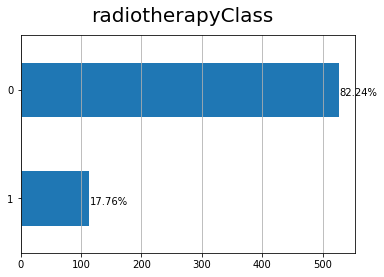

In [136]:
plot_percentages(state_sub_v2_df, "radiotherapyClass")

In [24]:
with open("datasets/mrmr_ft100_treat_v2.txt", "w") as fp:
    for ft in feats_100:
        fp.write("%s\n" % ft)

In [26]:
state_sub_v2_df.isnull().sum()


series_id              0
gpl                    0
channel_count          0
RFS                  196
DFS                  453
pCR                  649
ER                     0
HER2                 592
PR                   434
node                 159
tumor                434
pam_coincide           0
p5                     0
posOutcome             0
posOutcome2            0
radiotherapyClass      7
dtype: int64

In [44]:
##Training on features that have no or very few missing values
state_sub_v3_df = state_sub_v2_df[~state_sub_v2_df["radiotherapyClass"].isnull()]
state_sub_v3_df = state_sub_v3_df.drop(["channel_count", "RFS", "DFS", "pCR", "HER2", "node", "PR", "tumor",
                                        "posOutcome2"], axis=1)
state_sub_v3_df.isnull().sum()


series_id            0
gpl                  0
ER                   0
pam_coincide         0
p5                   0
posOutcome           0
radiotherapyClass    0
dtype: int64

In [45]:
state_sub_v3_df = label_encode(state_sub_v3_df)
state_sub_v3_df = state_sub_v3_df.astype(np.int64)
state_sub_v3_df = one_hot_encode(state_sub_v3_df, ["series_id", "gpl", "pam_coincide", "radiotherapyClass", "p5"])

In [46]:
ge_sub_v3_df = ge_df.loc[state_sub_v3_df.index,:]
ge_sub_outcome_v3_df = pd.merge(state_sub_v3_df, ge_sub_v3_df, left_index=True, right_index=True)
ge_sub_outcome_v3_df

,ER,posOutcome,series_id_0,series_id_1,series_id_2,series_id_3,gpl_0,gpl_1,gpl_2,pam_coincide_0,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,1,0,0,0,0,1,0,1,0,0,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,1,0,0,0,1,0,1,0,0,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,1,0,0,0,0,1,0,1,0,0,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,1,0,0,0,0,1,0,1,0,0,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1,0,0,0,1,0,1,0,0,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,1,1,0,0,0,0,0,1,0,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [128]:
X_sub_ge_v3, y_sub_ge_v3 = ge_sub_outcome_v3_df.drop(["posOutcome"], axis=1), ge_sub_outcome_v3_df["posOutcome"]

X_sub_ge_v3_train, X_sub_ge_v3_test, y_sub_ge_v3_train, y_sub_ge_v3_test = train_test_split(X_sub_ge_v3, y_sub_ge_v3, test_size=0.3, random_state=seed)

In [48]:
outcome_cols = state_sub_v3_df.drop(["posOutcome"], axis=1).columns.to_list()
print(outcome_cols)
params_ge_sub_v3, clf_ge_sub_v3, cv_scores_ge_sub_v3, test_scores_ge_sub_v3 = evaluate_ge(X_sub_ge_v3_train, y_sub_ge_v3_train, X_sub_ge_v3_test, y_sub_ge_v3_test, feats=feats_100_v2, outcome_cols=outcome_cols)
print(params_ge_sub_v3)

['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[20:45:29] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.93 seconds.
Best Score: 78.596%
{'subsample': 0.6, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.4s finished


In [49]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v3.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v3.mean()))

CV Score: 
balanced_accuracy    0.679635
recall_0             0.418577
precision_0          0.696667
recall_1             0.940694
precision_1          0.831089
auc                  0.785962
dtype: float64

Test Score:
balanced_accuracy    0.674551
recall_0             0.423729
precision_0          0.714286
recall_1             0.925373
precision_1          0.784810
auc                  0.822793
dtype: float64



In [51]:
print_score_comparison(cv_scores_ge_sub_v2, cv_scores_ge_sub_v3, header_1="W/o State",
                    header_2="With State", title="Validation Score")

	Validation Score	posOutcome
			W/o State		With State
		-------------------------------------------------------
balanced_accuracy:	65.36%				67.96%

recall_0:		37.79%				41.86%

precision_0:		64.52%				69.67%

recall_1:		92.94%				94.07%

precision_1:		81.68%				83.11%

auc:			79.73%				78.60%



In [52]:
print_score_comparison(cv_scores_ge_sub_v2, cv_scores_ge_sub_v3, header_1="W/o State",
                    header_2="With State", title="Test Score")

	Test Score	posOutcome
			W/o State		With State
		-------------------------------------------------------
balanced_accuracy:	65.36%				67.96%

recall_0:		37.79%				41.86%

precision_0:		64.52%				69.67%

recall_1:		92.94%				94.07%

precision_1:		81.68%				83.11%

auc:			79.73%				78.60%



Text(0.5, 1.0, 'Precision_Recall Curve')

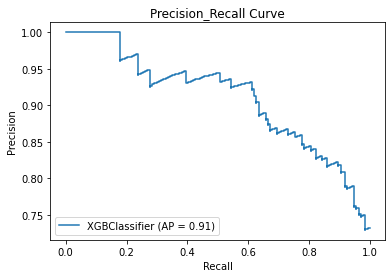

In [54]:
from sklearn.metrics import plot_precision_recall_curve
X_sub_ge_v3_test_sel = X_sub_ge_v3_test[outcome_cols + feats_100_v2]
disp = plot_precision_recall_curve(clf_ge_sub_v3, X_sub_ge_v3_test_sel, y_sub_ge_v3_test)
disp.ax_.set_title("Precision_Recall Curve")

In [70]:
state_sub_v4_df = state_sub_v2_df[~state_sub_v2_df["radiotherapyClass"].isnull()]
state_sub_v4_df = state_sub_v4_df.drop(["channel_count", "RFS", "DFS", "pCR",
                                        "posOutcome2"], axis=1)
state_sub_v4_df = label_encode(state_sub_v4_df)

In [71]:
state_sub_v4_df = one_hot_encode(state_sub_v4_df, ["series_id", "gpl", "pam_coincide", "radiotherapyClass", "p5"])
state_sub_v4_df = state_sub_v4_df.astype(np.float64)
state_sub_v4_df

,ER,HER2,PR,node,posOutcome,tumor,series_id_0,series_id_1,series_id_2,series_id_3,...,pam_coincide_2,pam_coincide_3,pam_coincide_4,radiotherapyClass_0,radiotherapyClass_1,p5_0,p5_1,p5_2,p5_3,p5_4
patient_ID,,,,,,,,,,,,,,,,,,,,,
22449,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
22450,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
22451,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
22452,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
22453,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441917,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
441918,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
441919,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
ge_sub_v4_df = ge_df.loc[state_sub_v4_df.index, :]
ge_sub_outcome_v4_df = pd.merge(state_sub_v4_df, ge_sub_v4_df, left_index=True, right_index=True)
ge_sub_outcome_v4_df

,ER,HER2,PR,node,posOutcome,tumor,series_id_0,series_id_1,series_id_2,series_id_3,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
22449,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.560791,7.325761,7.712692,7.505766,3.928333,4.595116,5.512795,7.291262,6.626688,8.059083
22450,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.008537,7.175220,6.823591,11.356938,3.950556,2.851631,4.666013,5.994875,5.619837,7.265902
22451,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.548279,6.017597,6.386842,8.191975,3.754025,3.212675,5.312667,6.974660,4.953440,5.237441
22452,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.037482,7.497329,6.848631,11.334273,3.573169,2.772652,5.661542,6.188046,6.635075,6.261023
22453,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.814779,7.470131,7.739834,7.775924,3.758116,2.837425,5.918060,6.168264,5.724966,7.322795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441917,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,7.208498,6.803962,7.131431,3.569871,3.626728,6.121147,6.403925,5.895984,6.760917
441918,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,8.069725,7.600192,8.075222,3.569871,3.626728,5.506148,6.462088,5.763423,7.151660
441919,1.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1.0,0.0,...,3.500689,7.332330,7.810383,8.636448,3.569871,3.626728,5.731390,7.149135,5.763423,5.783338


In [66]:
X_sub_ge_v4, y_sub_ge_v4 = ge_sub_outcome_v4_df.drop(["posOutcome"], axis=1), ge_sub_outcome_v4_df["posOutcome"]

X_sub_ge_v4_train, X_sub_ge_v4_test, y_sub_ge_v4_train, y_sub_ge_v4_test = train_test_split(X_sub_ge_v4, y_sub_ge_v4, test_size=0.3, random_state=seed)

In [67]:
outcome_cols = state_sub_v4_df.drop(["posOutcome"], axis=1).columns.to_list()
params_ge_sub_v4, clf_ge_sub_v4, cv_scores_ge_sub_v4, test_scores_ge_sub_v4 = evaluate_ge(X_sub_ge_v4_train, y_sub_ge_v4_train, X_sub_ge_v4_test, y_sub_ge_v4_test, feats=feats_100_v2, outcome_cols=outcome_cols)
print(params_ge_sub_v4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[21:20:45] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.46 seconds.
Best Score: 75.934%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
[21:21:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.9s finished


In [68]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v4.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v4.mean()))

CV Score: 
balanced_accuracy    0.629841
recall_0             0.349538
precision_0          0.647794
recall_1             0.910144
precision_1          0.782025
auc                  0.759336
dtype: float64

Test Score:
balanced_accuracy    0.760435
recall_0             0.622222
precision_0          0.651163
recall_1             0.898649
precision_1          0.886667
auc                  0.868769
dtype: float64



In [87]:
#Set scale_pos_weight as the dataset is imbalanced , see - https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html
class_1_sum = state_sub_v4_df[state_sub_v4_df["posOutcome"] == 1]["posOutcome"].count()
class_0_sum = state_sub_v4_df[state_sub_v4_df["posOutcome"] == 0]["posOutcome"].count()
scale_weight = class_1_sum/class_0_sum
print(scale_weight)

2.754385964912281


In [93]:
outcome_cols = state_sub_v4_df.drop(["posOutcome"], axis=1).columns.to_list()
params_ge_sub_v6, clf_ge_sub_v5, cv_scores_ge_sub_v5, test_scores_ge_sub_v5 = evaluate_ge(X_sub_ge_v4_train, y_sub_ge_v4_train, X_sub_ge_v4_test, y_sub_ge_v4_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                        scale_weight=scale_weight)
print(params_ge_sub_v4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:53:21] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:53:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.41 seconds.
Best Score: 75.934%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
[14:53:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.8s finished


In [94]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v5.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v5.mean()))

CV Score: 
balanced_accuracy    0.592043
recall_0             0.246154
precision_0          0.638345
recall_1             0.937933
precision_1          0.761353
auc                  0.753202
dtype: float64

Test Score:
balanced_accuracy    0.717417
recall_0             0.488889
precision_0          0.733333
recall_1             0.945946
precision_1          0.858896
auc                  0.857207
dtype: float64



In [95]:
print_score_comparison(cv_scores_ge_sub_v4, cv_scores_ge_sub_v5, header_1="W/o Weight", header_2="With Weight",
                       title="Validation set")

	Validation set	posOutcome
			W/o Weight		With Weight
		-------------------------------------------------------
balanced_accuracy:	62.98%				59.20%

recall_0:		34.95%				24.62%

precision_0:		64.78%				63.83%

recall_1:		91.01%				93.79%

precision_1:		78.20%				76.14%

auc:			75.93%				75.32%



In [96]:
print_score_comparison(test_scores_ge_sub_v4, test_scores_ge_sub_v5, header_1="W/o Weight", header_2="With Weight",
                       title="Test set")

	Test set	posOutcome
			W/o Weight		With Weight
		-------------------------------------------------------
balanced_accuracy:	76.04%				71.74%

recall_0:		62.22%				48.89%

precision_0:		65.12%				73.33%

recall_1:		89.86%				94.59%

precision_1:		88.67%				85.89%

auc:			86.88%				85.72%



In [97]:
scale_weight_2 = class_0_sum/class_1_sum
params_ge_sub_v6, clf_ge_sub_v6, cv_scores_ge_sub_v6, test_scores_ge_sub_v6 = evaluate_ge(X_sub_ge_v4_train, y_sub_ge_v4_train, X_sub_ge_v4_test, y_sub_ge_v4_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                        scale_weight=scale_weight_2)
print(params_ge_sub_v6)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:58:42] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:58:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.05 seconds.
Best Score: 75.934%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
[14:59:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.5s finished


In [98]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v6.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v6.mean()))

CV Score: 
balanced_accuracy    0.648865
recall_0             0.492923
precision_0          0.507561
recall_1             0.804808
precision_1          0.804052
auc                  0.756817
dtype: float64

Test Score:
balanced_accuracy    0.747447
recall_0             0.711111
precision_0          0.500000
recall_1             0.783784
precision_1          0.899225
auc                  0.862162
dtype: float64



In [99]:
print_score_comparison(test_scores_ge_sub_v5, test_scores_ge_sub_v6, header_1="Weight 1", header_2="Weight 2",
                       title="Test set")

	Test set	posOutcome
			Weight 1		Weight 2
		-------------------------------------------------------
balanced_accuracy:	71.74%				74.74%

recall_0:		48.89%				71.11%

precision_0:		73.33%				50.00%

recall_1:		94.59%				78.38%

precision_1:		85.89%				89.92%

auc:			85.72%				86.22%



In [109]:
ge_sub_outcome_v3_df

,ER,posOutcome,series_id_0,series_id_1,series_id_2,series_id_3,gpl_0,gpl_1,gpl_2,pam_coincide_0,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,1,0,0,0,0,1,0,1,0,0,...,2.530937,4.764612,6.002157,10.165004,3.644893,3.493543,5.250279,8.595672,4.591821,5.901994
249524,1,1,0,0,0,1,0,1,0,0,...,2.464062,5.835134,6.435929,11.579536,4.449289,3.011831,4.597011,8.041897,4.905542,8.131689
249527,1,0,0,0,0,1,0,1,0,0,...,2.431650,5.926365,5.639895,11.000703,4.175154,3.118038,4.806405,8.775220,4.301683,5.929492
249529,1,0,0,0,0,1,0,1,0,0,...,2.445920,5.357289,5.250271,10.654033,3.496367,3.371561,5.002028,8.645329,4.421538,5.530777
249530,1,1,0,0,0,1,0,1,0,0,...,2.342124,6.391905,5.640498,10.503481,4.316220,3.318911,4.960007,8.778932,4.873731,5.715205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.146800,6.536861,9.483889,4.356431,3.521218,5.773784,6.179846,5.780236,6.254059
305261,1,1,1,0,0,0,0,0,1,0,...,3.466420,6.954935,6.540439,8.212546,3.744025,3.521218,5.322723,6.510751,5.732561,6.278364
305262,1,1,1,0,0,0,0,0,1,0,...,3.466420,5.263743,6.896036,2.532040,3.452189,3.521218,4.587512,3.799424,6.155523,7.120667


In [110]:
ge_sub_outcome_v3_df.to_csv("ge_state_outcome_tamoxifen_v3.csv")
ge_sub_outcome_v4_df.to_csv("ge_state_outcome_tamoxifen_v4.csv")

In [103]:
#Stratification with dataset containing Null values with scale_pos_weight
X_sub_ge_v7, y_sub_ge_v7 = ge_sub_outcome_v4_df.drop(["posOutcome"], axis=1), ge_sub_outcome_v4_df["posOutcome"]

X_sub_ge_v7_train, X_sub_ge_v7_test, y_sub_ge_v7_train, y_sub_ge_v7_test = train_test_split(X_sub_ge_v7, y_sub_ge_v7, test_size=0.3, random_state=seed, stratify=y_sub_ge_v7)

In [104]:
print(outcome_cols)
params_ge_sub_v7, clf_ge_sub_v7, cv_scores_ge_sub_v7, test_scores_ge_sub_v7 = evaluate_ge(X_sub_ge_v7_train, y_sub_ge_v7_train, X_sub_ge_v7_test, y_sub_ge_v7_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                                                scale_weight=scale_weight)
print(params_ge_sub_v7)

['ER', 'HER2', 'PR', 'node', 'tumor', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:06:18] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:06:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.16 seconds.
Best Sco

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.6s finished


In [105]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v7.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v7.mean()))

CV Score: 
balanced_accuracy    0.621189
recall_0             0.266667
precision_0          0.809169
recall_1             0.975711
precision_1          0.786080
auc                  0.763772
dtype: float64

Test Score:
balanced_accuracy    0.600801
recall_0             0.215686
precision_0          0.846154
recall_1             0.985915
precision_1          0.777778
auc                  0.809169
dtype: float64



In [106]:
print_score_comparison(test_scores_ge_sub_v5, test_scores_ge_sub_v7 , header_1="Split 1", header_2="Split 2(Stratification)", title="Test set")

	Test set	posOutcome
			Split 1		Split 2(Stratification)
		-------------------------------------------------------
balanced_accuracy:	71.74%				60.08%

recall_0:		48.89%				21.57%

precision_0:		73.33%				84.62%

recall_1:		94.59%				98.59%

precision_1:		85.89%				77.78%

auc:			85.72%				80.92%



In [118]:
X_sub_ge_v8, y_sub_ge_v8 = ge_sub_outcome_v3_df.drop(["posOutcome"], axis=1), ge_sub_outcome_v3_df["posOutcome"]
X_sub_ge_v8_train, X_sub_ge_v8_test, y_sub_ge_v8_train, y_sub_ge_v8_test = train_test_split(X_sub_ge_v8, y_sub_ge_v8, test_size=0.3, random_state=seed, stratify=y_sub_ge_v8)

In [119]:
#Stratification with dataset containing Non-null values without scale_pos_weight
outcome_cols = state_sub_v3_df.drop(["posOutcome"], axis=1).columns.to_list()
print(outcome_cols)
params_ge_sub_v8, clf_ge_sub_v8, cv_scores_ge_sub_v8, test_scores_ge_sub_v8 = evaluate_ge(X_sub_ge_v8_train, y_sub_ge_v8_train, X_sub_ge_v8_test, y_sub_ge_v8_test, feats=feats_100_v2, outcome_cols=outcome_cols)
print(params_ge_sub_v8)

['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:36:51] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.98 seconds.
Best Score: 79.188%
{'subsample': 0.8, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.4s finished


In [120]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v8.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v8.mean()))

CV Score: 
balanced_accuracy    0.500000
recall_0             1.000000
precision_0          0.267266
recall_1             0.000000
precision_1          0.000000
auc                  0.500000
dtype: float64

Test Score:
balanced_accuracy    0.500000
recall_0             1.000000
precision_0          0.264249
recall_1             0.000000
precision_1          0.000000
auc                  0.500000
dtype: float64



In [122]:
#Stratification with dataset containing Non-null values with scale_pos_weight
params_ge_sub_v9, clf_ge_sub_v9, cv_scores_ge_sub_v9, test_scores_ge_sub_v9 = evaluate_ge(X_sub_ge_v8_train, y_sub_ge_v8_train, X_sub_ge_v8_test, y_sub_ge_v8_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                                                           scale_weight=scale_weight)
print(params_ge_sub_v9)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:40:39] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:40:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.22 seconds.
Best Score: 79.188%
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 2, 'colsample_bytree': 0.6}
[16:41:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.6s finished


In [124]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v9.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v9.mean()))

CV Score: 
balanced_accuracy    0.662477
recall_0             0.358333
precision_0          0.798889
recall_1             0.966620
precision_1          0.805588
auc                  0.788582
dtype: float64

Test Score:
balanced_accuracy    0.541218
recall_0             0.117647
precision_0          0.545455
recall_1             0.964789
precision_1          0.752747
auc                  0.776443
dtype: float64



In [126]:
#Stratification with dataset containing Non-null values with scale_pos_weight 2
params_ge_sub_v10, clf_ge_sub_v10, cv_scores_ge_sub_v10, test_scores_ge_sub_v10 = evaluate_ge(X_sub_ge_v8_train, y_sub_ge_v8_train, X_sub_ge_v8_test, y_sub_ge_v8_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                                                           scale_weight=scale_weight_2)
print(params_ge_sub_v10)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:46:46] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:46:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.22 seconds.
Best Score: 79.188%
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 2, 'colsample_bytree': 0.6}
[16:47:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.6s finished


In [127]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v10.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v10.mean()))

CV Score: 
balanced_accuracy    0.714918
recall_0             0.600000
precision_0          0.562789
recall_1             0.829837
precision_1          0.852511
auc                  0.794019
dtype: float64

Test Score:
balanced_accuracy    0.692281
recall_0             0.490196
precision_0          0.625000
recall_1             0.894366
precision_1          0.830065
auc                  0.799503
dtype: float64



In [129]:
X_sub_ge_v3b_train, X_sub_ge_v3b_test, y_sub_ge_v3b_train, y_sub_ge_v3b_test = train_test_split(X_sub_ge_v3, y_sub_ge_v3, test_size=0.3, random_state=seed)

In [130]:
#Non-null without stratification with scale weight
params_ge_sub_v3b, clf_ge_sub_v3b, cv_scores_ge_sub_v3b, test_scores_ge_sub_v3b = evaluate_ge(X_sub_ge_v3_train, y_sub_ge_v3_train, X_sub_ge_v3_test, y_sub_ge_v3_test, feats=feats_100_v2, outcome_cols=outcome_cols,
                                                           scale_weight=scale_weight)
print(params_ge_sub_v3b)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[16:49:12] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:49:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.78 seconds.
Best Score: 78.596%
{'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}
[16:49:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.2s finished


In [131]:
print("CV Score: \n{0}\n".format(cv_scores_ge_sub_v3b.mean()))
print("Test Score:\n{0}\n".format(test_scores_ge_sub_v3b.mean()))

CV Score: 
balanced_accuracy    0.656990
recall_0             0.346640
precision_0          0.817802
recall_1             0.967340
precision_1          0.818329
auc                  0.770291
dtype: float64

Test Score:
balanced_accuracy    0.668796
recall_0             0.389831
precision_0          0.766667
recall_1             0.947761
precision_1          0.779141
auc                  0.816721
dtype: float64



In [132]:
print_score_comparison(test_scores_ge_sub_v3, test_scores_ge_sub_v3b, header_1="Non-Null w/o Weight",
                    header_2="Non-Null w/ Weight", title="Test set")

	Test set	posOutcome
			Non-Null w/o Weight		Non-Null w/ Weight
		-------------------------------------------------------
balanced_accuracy:	67.46%				66.88%

recall_0:		42.37%				38.98%

precision_0:		71.43%				76.67%

recall_1:		92.54%				94.78%

precision_1:		78.48%				77.91%

auc:			82.28%				81.67%



In [133]:
print_score_comparison(test_scores_ge_sub_v3, test_scores_ge_sub_v4, header_1="Non-Null w/o Weight",
                    header_2="Null w/o Weight", title="Test set")

	Test set	posOutcome
			Non-Null w/o Weight		Null w/o Weight
		-------------------------------------------------------
balanced_accuracy:	67.46%				76.04%

recall_0:		42.37%				62.22%

precision_0:		71.43%				65.12%

recall_1:		92.54%				89.86%

precision_1:		78.48%				88.67%

auc:			82.28%				86.88%

